In [2]:
import tensorflow as tf 

data_aug = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip = True,
    vertical_flip = True,
    rescale=1/255.0
)

In [3]:
import os 

os.chdir("D:\ArtificialIntelligence_batch21\data\cat_dog_tiger")

In [23]:
input_size = (256,256)
data_gen = data_aug.flow_from_directory(
    os.getcwd(),
    shuffle =True,
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size=16,
    target_size= input_size
)

Found 28 images belonging to 3 classes.


In [24]:
test_img = None
test_label = None

for sample_image, sample_label in data_gen:
    test_img = sample_image[0]
    test_label = sample_label[0]
    break



Text(0.5, 0, '[1. 0. 0.]')

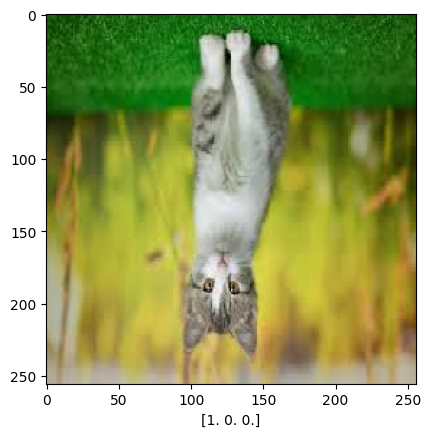

In [25]:
import matplotlib.pyplot as plt 

plt.imshow(test_img)
plt.xlabel(test_label)

In [34]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
class custom_model(Model):
    def __init__(self, input_shape, output_shape):
        super().__init__()
        
        self.conv32 = Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=input_shape)
        self.conv64 = Conv2D(64, kernel_size=(3,3), activation ="relu")
        self.maxpool2D = MaxPooling2D((2,2))
        self.conv128 = Conv2D(128, kernel_size=(3,3), activation='relu')
        self.flatten = Flatten()
        self.output_shape = Dense(output_shape, activation="softmax")
        
    def call(self,x): ### call function does this listing the layers
        x = self.conv32(x)
        x = self.conv64(x)
        x = self.maxpool2D(x)
        x = self.conv128(x)
        x = self.flatten(x)
        x = self.output_shape(x)
        return x

In [43]:
model = custom_model(input_shape=(256,256), output_shape=3)
model.summary()

d:\anaconda3\envs\langchain\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "custom_model_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [44]:
from tensorflow.keras.optimizers import Adam

model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=['accuracy'])

In [45]:
history = model.fit(data_gen,epochs=20,verbose=1)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 5s/step - accuracy: 0.2738 - loss: 17.1985
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.2222 - loss: 6.8801
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.2768 - loss: 2.6381
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.5992 - loss: 0.9801
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.6468 - loss: 0.8077
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.8730 - loss: 0.6144
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.6984 - loss: 0.5608
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.8016 - loss: 0.4993
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.8532 - loss: 0.3246
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.7698 - loss: 0.4566
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.8254 - loss: 0.2906
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.9077 - loss: 0.3159
Epoch 13/20
2/2 ━━━━━━━

In [46]:
import json 

class_names = data_gen.class_indices
class_names

{'cat': 0, 'dog': 1, 'tiger': 2}

In [56]:
import cv2
import numpy as np


testing_image = "D:\\ArtificialIntelligence_batch21\\data\\cat_dog_tiger\\dog\\1321.jpg"
testing_image = cv2.imread(testing_image)
testing_image = cv2.resize(testing_image, (256,256))
testing_image1 = testing_image.astype('float32')
print(testing_image1.shape)
pred = model.predict(np.array([testing_image1]))
pred

(256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


array([[1., 0., 0.]], dtype=float32)

In [57]:
np.argmax(pred)

0